# Workshop 12: Time for fun with AR(2)

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4. Wednesday December 6, 2023.*

## Introduction

In general we are interested in identifying the components of a time series, to check stationarity, make statistical judgments, and to identify the appropriate functional model and the stochastic model (ARMA process). In this workshop we will generate a synthetic time series, $S_t$ using a second-order auto-regressive random process ((AR(2)).

Autoregressive models AR(p) are widely used in time series analysis to understand and predict sequential data points. As a special case, AR(2) process refers to a second-order autoregressive model, where each data point is linearly dependent on its two immediate preceding values. One practical application of AR(2) models involves prediction. In many practical applications, however, in addition to the noise process, there exist also a linear trend in the form of $Y=Ax+\epsilon$. To implement prediction, we need to calculate two terms: one called the functional part (from the linear model) and one the stochastic model (from the noise process). The objectives of this workshop are to:

- generate a noise process of AR(2) with the given parameters $\beta_1$ and $\beta_2$.
- calculate the normalized autocovariance function (ACF) and power spectral density (PSD), and investigate their interlink.
- estimate the AR(2) parameters $\beta_1$ and $\beta_2$ for a given noise process AR(2).
- predict future values based on the given linear model $Y=Ax+\epsilon$ and the noise process

Considering the model $Y=Ax+\epsilon$ note the following:
- This is conceptually the same, and uses the same notation, as with observation theory topics from Q1, 
- Our signal of interest is the $Ax$ part
- The "noise" is $\epsilon$ and can be broken down into two more components: 1) _stochastic signal_, and 2) random errors
- the _stochastic signal_ is our focus of today; in general we use an ARMA model to represent the stochastic signal, and depending on the assumptions, it can take many forms (e.g., AR(1), AR(2), etc; defined by the parameters $p$ and $q$)
- The symbol $\epsilon$ represents the overall noise of the original time series, whereas the symbole $e$ is the random errors (the part that is left after we take out the stochastic signal from the noise of the original time series using an ARMA process).

In this notebook specifically, we will complete the following tasks:
1. Generate the time series, then evaluate stationarity and variance
2. Evaluate auto-regressive characteristics with ACF and PSD
3. Estimate prameters of AR(2) model
4. Use model to make a prediction (using BLUE)

For each Task, there will be two parts: part a focuses on the implementation of the method in the code, and part b reflects on the results.

In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from statsmodels.graphics.tsaplots import plot_acf  
from scipy.stats import norm
from scipy.stats.distributions import chi2
%matplotlib inline

## Task 1: Generate Time Series
We intend to simulate (as a time series) 1000 samples at 1-day intervals (so $t=1,...,m$ with $m=1000$ days).

_Note: the convention for Time Series and Observation Theory is to use symbole $m$ for the number of samples; however, the symbol $N$ is used in Signal Processing, so in this case $m=N$._

The simulated data is based on a second-order auto-regressive AR(2) random process $S_t$ as follows:
$$
S_t= \beta_1 S_{t-1}+\beta_2 S_{t-2}+e_t
$$
with $t = 1, …, 1000$. The AR(2) process is a stationary time series with a constant mean $\mu$ and the variance $\sigma^2$. We set them as follows:

$$
\mathbb{E}(S_t)=0 \text{,} \hspace{2mm} \mathbb{D}(S_t)=\sigma^2=2.
$$ 

The two parameters of AR(2) are $\beta_1$ and $\beta_2$, and we will consider 2 scenarios:

1. Scenario 1: $\beta_1=0.65$ and $\beta_2=0.30$ (colored)
2. Scenario 2: $\beta_1=\beta_2=0$ (white)

The variance of the purely random noise (white noise) $e_t$ is $\sigma^2_e$, which for AR(2), is obtained from the following equation:

$$
\sigma_{e}^2 = \frac{(1+\beta_2)(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)}{1-\beta_2} \sigma^2
$$

To simulate the data of the AR(2) process, you can make use of a normal distribution; however, _as the realizations of the time series are correlated with each other, we can no longer take random samples from the distribution directly!_ To properly take into account autocorrelation, you will use the above recursive form, which needs initialization. To initialize the first and second data, <code>S[0]=np.random.normal(...)</code> and <code>S[1] = np.random.normal(...)</code> using the normal distribution. You can find information on <code>np.random.normal()</code> [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal). To use the above recursive formula you need to simulate $e_t$, requiring to have its standard deviation $\sigma_{e}$ of the white noise process (given above).

After generating the time series we may compute the mean and variance to see if they are close to their original values
$$
\hat{\mu} = \frac{1}{m} \sum_{i=1}^{m} S_i 
$$
and
$$
\hat{\sigma}^2 =\hat{C}_0 = \frac{1}{m} \sum_{i=1}^{m} S_i^2 
$$
which are unbiased estimates of $\mu=0$ and $\sigma^2 =2$, respectively. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1a:</b>   

Complete the code cells below to perform the following analysis:
<ol>
    <li>Compute the standard deviation $\sigma_{e}$ based on the provided values for scenario 1. 
    <li>Simplify the above formula for $\sigma_{e} $ by taking $\beta_1=\beta_2 =0$ (scenario 2).
    <li> Simulate the data of the AR(2) process based on the above given values (for the above two scenarios). Plot the simulated data versus time.
</ol>
</p>
</div>

In [ ]:
def gen_AR2(beta1,beta2,sigma,m):
    sigma_e = YOUR_CODE_HERE
    S = np.zeros(m)
    S[0] = np.random.normal(loc=0, scale=sigma, size=None)
    S[1] = np.random.normal(loc=0, scale=sigma, size=None)
    for i in range(2, m):
        YOUR_CODE_HERE
        
    return sigma_e, S

In [ ]:
m = 1000
t = np.arange(1, m + 1)
# sampling frequency is 1 cycle/day
Fs = 1.0
# standard deviation of the noise process
sigma = np.sqrt(2)          

# Scenario 1
beta1 = YOUR_CODE_HERE
beta2 = YOUR_CODE_HERE

sigma_e_1, S1 = gen_AR2(YOUR_CODE_HERE)

print(f'Sigma for Scenario 1 is: \t\t {sigma:.3f}')
print(f'Sigma_e for Scenario 1 is: \t\t {sigma_e_1:.3f}')


# Create the first plot (Time series data)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(t, S1, '-', color='blue', label='signal')
plt.grid(True)
plt.box(True)
plt.xlabel('Time (sec)')
plt.ylabel('TS data: S1(t)')
plt.title('Scenario 1')
plt.legend()
# compute the mean and variance of the generated time series
mu_S1 = np.mean(S1)
print(f'The mean of generated S1 process is:\t {mu_S1:.3f}')
sigma_S1 = S1.T@S1/m
print(f'The standard deviation of generated S1 process is: {np.sqrt(sigma_S1):.3f}')


# Scenario 2
beta1 = YOUR_CODE_HERE
beta2 = YOUR_CODE_HERE

sigma_e_2, S2 = gen_AR2(YOUR_CODE_HERE)

print(f'\nSigma for Scenario 2 is: \t\t {sigma:.3f}')
print(f'Sigma_e for Scenario 2 is: \t\t {sigma_e_2:.3f}')

# Create the first plot (Time series data)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(t, S2, '-', color='blue', label='signal')
plt.grid(True)
plt.box(True)
plt.xlabel('Time (sec)')
plt.ylabel('TS data: S2(t)')
plt.title('Scenario 2')
plt.legend()
# compute the mean and variance of the generated time series
mu_S2 = np.mean(S2)
print(f'The mean of generated S2 process is:\t {mu_S2:.3f}')
sigma_S2 = S2.T@S2/m
print(f'The standard deviation of generated S2 process is: {np.sqrt(sigma_S2):.3f}')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1b:</b>   
<ol>
    <li>Explain your reasoning for expecting a smaller value of $\sigma_{e}$ compared to $\sigma$. </li>
    <li>Does AR(2) reduce to the white noise process? Compare the $\sigma_{e}$ of the two processes and with true standard deviation of the two process, i.e. $\sigma$.</li>
    <li>Can you see/explain the two types/levels of time correlations for these two scenarios? </li>
    <li>Do the two time series look stationary? Compute the mean and variance of the two processes. Are they comparable with the original values of $\mu=0$ and $\sigma^2=2$? Run your Jupyter scripts several times to make more concrete conclusions.</li>
</ol>
</p>
</div>

**Write your answer in this Markdown cell.**

## Task 2: ACF and PSD
The next step is to calculate the normalized autocovariance function (ACF) for the generated time series. The autocovariance function can be estimated from the following equation.
$$
\hat{C}_{\tau} = \frac{1}{m-\tau} \sum_{i=1}^{m-\tau} (S_i-\mu_s)(S_{i+\tau}-\mu_s)
= \frac{1}{m-\tau} \sum_{i=1}^{m-\tau} S_i\, S_{i+\tau}
$$
The normalized autocovariance function (ACF) can directly be obtained from the auto-covariance function as
$$
ACF = \hat{\rho}_{\tau} =\frac{\hat{C}_{\tau}}{\hat{C}_{0}}
$$
where $\hat{C}_{0}=\sigma^2$ is the variance of the process. You can compute the ACF yourself, simply by implementing the above formula in Python. There are however Python commands/functions that can simply produce the ACF (in fact different ways can be employed to compute the ACF in Python). We utilize the functions provided by <code>statsmodels</code>, specifically the <code>plot_acf</code> function. For more information see [here](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html).
This command can also have optional parameters like $\alpha$ (false alarm), for example $\alpha=0.05$ to make a 95% confidence interval for the computed ACF. 

On top of that, we also want to take a look at the power spectral density ([PSD](https://mude.citg.tudelft.nl/book/time_series/acf.html#power-spectral-density)). The PSD is the discrete Fourier transform of the ACF. Of course, there are plenty Python functions that will help you compute the PSD. See for example [the example in the MUDE textbook](https://mude.citg.tudelft.nl/book/time_series/exercise4.html).


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2a:</b>   

Complete the code cells below to create a plot of ACF and PSD.
</p>
</div>

In [ ]:
# Plot ACF and PSD for scenario 1
# Plot ACF for the generated process (S1)
plot_acf(YOUR_CODE_HERE, lags=100, alpha=0.01, color = 'blue', label='ACF')
plt.ylabel('Normalized ACF')
plt.xlabel('Lag (day)')
plt.title('Normalized ACF')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.box(True)

# Calculate and plot power spectral density (PSD) of the generated signal: S1
frequencies, psd = signal.periodogram(YOUR_CODE_HERE, fs=Fs, scaling='density', return_onesided=False)
# Create the second plot (Power spectral density)
plt.figure(figsize=(10, 5))
plt.loglog(frequencies, psd, color='blue', label='PSD')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency (cycle/day)')
plt.title('Power Spectral Density (PSD)')
plt.ylim([1e-3, 5e2])
plt.legend()
plt.grid(True)
plt.box(True)

# Plot ACF and PSD for scenario 2
# Plot ACF for the generated process (S2)
plot_acf(YOUR_CODE_HERE, lags=100, alpha=0.01, color = 'blue', label='ACF')
plt.ylabel('Normalized ACF')
plt.xlabel('Lag (day)')
plt.title('Normalized ACF')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.box(True)

# Calculate and plot power spectral density (PSD) of the generated signal: S2
frequencies, psd = signal.periodogram(YOUR_CODE_HERE, fs=Fs, scaling='density', return_onesided=False)
# Create the second plot (Power spectral density)
plt.figure(figsize=(10, 5))
plt.loglog(frequencies, psd, color='blue', label='PSD')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency (cycle/day)')
plt.title('Power Spectral Density (PSD)')
plt.ylim([1e-3, 5e2])
plt.legend()
plt.grid(True)
plt.box(True)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2b:</b>   
<ol>
    <li>Compare the ACF of the two processes. $S_1$ shows a heavy temporal correlation. Can you explain/link this to the parameters $\beta_1$, $\beta_2$ and $\sigma_{e}$?</li>
    <li>Compare the PSD of the two processes. We cannot see any clear 'peak' in either of these PSD. Can you explain it why? Can you explain the slope in the PSD of $S_1$ process?</li>
</ol>
</p>
</div>

**Write your answer in this Markdown cell.**

## Task 3: Estimation of AR(2) parameters
Assume that we know the noise process is AR(2), so we know $S_t= \beta_1 S_{t-1}+\beta_2 S_{t-2}+e_t$. However we assume that the two parameters $\beta_1$ and $\beta_2$ are unknown, to be estimated. This can be implemented using the provided function <code>AR_estimation(S, p)</code> (see below) for AR(p) in general. The function provides the $\beta$ parameters, their standard deviations and the standard deviation $\sigma_{e}$ of $e(t)={e}_t$.

The formula in task 1 can be inverted to obtain the variance $\sigma^2$ of the noise process from $\sigma^2_{e}$ as follow:
$$
\sigma^2 = \frac{1-\beta_2}{(1+\beta_2)(1-\beta_1-\beta_2)(1+\beta_1-\beta_2)} \sigma_{e}^2
$$

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3a:</b>   

It is required to:
<ol>
    <li> Estimate $\beta_1$ and $\beta_2$, along with their standard deviations, for the two processes $S_1$ and $S_2$. Compare them with the original values in task 1.
    <li> Compute the standard deviation $\sigma_{e}$ for the two processes and compare them with the known vales in task 1.
    <li> Compute the standard deviation $\sigma$ from the parameters $\beta_1$, $\beta_2$ and $\sigma_{e}$ for the two processes $S_1$ and $S_2$.
    </ol>
</p>
</div>

In [ ]:
def AR_estimation(S, p):
    """
    This function computes the AR(p) parameters beta_1,...,beta_p 
    for an AR(p) process Y (stationary S: for example epsilon hat).
    
    INPUT:
        S: m x 1 observations (time series)
        p: order of AR
    OUTPUT:
        Beta: Parameters Beta
        S_Beta: Standard deviation of Beta 
        Sigma_e: Standard deviation of white noise 
    """
    m = len(S)
    # make the design matrix
    A = np.zeros((m-p, p))
    for i in range(1, p+1):
        A[:,i-1] = S[p-i:m-i]

    # removing the first p data from s
    S = S[p:m]
    m, p = A.shape

    # least squares estimate of Beta
    Beta = np.linalg.inv(A.T @ A) @ A.T @ S

    # least squares estimate of residuals (white noise)
    Ehat = S - A @ Beta

    # estimation of variance of data (white noise)
    Sig2 = (Ehat.T @ Ehat) / (m - p)

    # covariance matrix of Beta
    Sigma_Beta = Sig2 * np.linalg.inv(A.T @ A)

    # standard deviation of Beta
    std_Beta = np.sqrt(np.diag(Sigma_Beta))

    # standard deviation of white noise
    Sigma_e = np.sqrt(Sig2)
    
    return Beta, std_Beta, Sigma_e

In [ ]:
# AR(2) parameter estimation for S1
beta_p1, std_beta_p1, sigma_e_p1 = AR_estimation(YOUR_CODE_HERE)
var_p1 = YOUR_CODE_HERE
print('Beta1 and Beta2 for S1 process are: ',beta_p1)
print('Standard deviations of Beta1 and Beta2 for S1 process are: ',std_beta_p1)
print('Standard deviation of e(t) for S1 process is:',sigma_e_p1)
print('Standard deviation for S1 process is:',np.sqrt(var_p1))

# AR(2) parameter estimation for S2
beta_p2, std_beta_p2, sigma_e_p2 = AR_estimation(YOUR_CODE_HERE)
var_p2 = YOUR_CODE_HERE
print('\n')
print('Beta1 and Beta2 for S2 process are: ',beta_p2)
print('Standard deviations of Beta1 and Beta2 for S2 process are: ',std_beta_p2)
print('Standard deviation of e(t) for S2 process is:',sigma_e_p2)
print('Standard deviation for S2 process is:',np.sqrt(var_p2))

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3b:</b>   
Compare the calculated standard deviations with those estimated in task 1. Are they close? 
</p>
</div>

**Write your answer in this Markdown cell.**

## Prediction
Now that we have information about the noise, we can use this to make a forecast. Read about this in [chapter 4.7](https://mude.citg.tudelft.nl/book/time_series/forecasting.html). 
We apply a simple prediction model. For that we need the $Y=Ax+\epsilon$ and $\Sigma_Y$ and the design matrix of the prediction model $A_p$. For our model, we can generate some data from a linear regression model $y(t)=y_0+r t$, with $y_0=0.1$ and $r=0.002$ (error-free data). The generated data $y$ is then added to the noise process data $S$ (here we only use $S_1$).
This will then make the final $m\times 1$ observation vector $Y_{true}$ as follows:
$$
Y_{true}= \begin{bmatrix} Y \\ Y_p\end{bmatrix} = y+S
$$

In order to show how prediction works, we will use the first $m-1$ entries as the 'observed values' $Y$. The last value we generate will serve as our 'true value' of $Y_p$. This value will be assumed unknown, but we will use it to compare the predicted value $\hat{Y}_p$ with. 

The design matrices become:
$$
A = \begin{bmatrix} 1 & t_1 \\ \vdots & \vdots \\ 1 & t_{m-1} \end{bmatrix} \quad \text{and} \quad A_p=\begin{bmatrix} 1 &t_m\end{bmatrix} 
$$


For simplicity we assume $\Sigma_Y = \sigma^2 I_{m-1}$. 

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Chapter 4.7 and 4.8 are not part of the exam material, but we include this exercise here to help understand the methods used above. It will also help you complete the project on Friday.</p></div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   

Do the following:
<ol>
    <li> Establish the observation vector $Y$ and design matrix $A$ based on the description above.
    <li> Split $Y$ and $A$ into a new $A$ and $Y$ (for the linear model) and $A_p$ and $Y_p$ (for the prediction model).
    <li> Follow the steps in Chapter 4.7 to predict $Y_p$, so $\hat{Y}_p$. You can first use the function 'AR_estimation(Y, p)' to estimate the AR(2) parameters $\beta_1$ and $\beta_2$ for the estimated residuals.
    <li> Compare the values $\hat{Y}_p$ with $Y_p$ and also with the function part of $\hat{Y}_p$, $\hat{Y}_{signal}=A_p \hat{X}$.
</ol>
</p>
</div>

Yp_f:  2.012792540344711 Yp_n:  -0.9024262790540022
Yp:  0.6654294026146608 Yphat:  1.1103662612907086


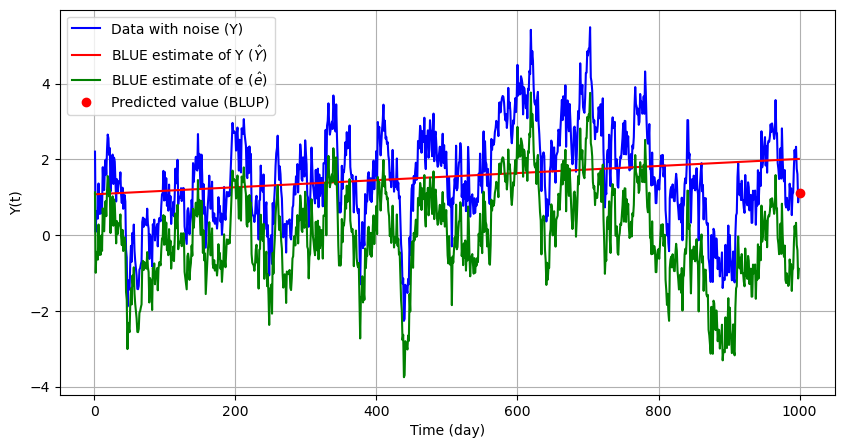

In [8]:
# we take only AR(2) process
S = S1

# total number of data
m = 1000
t = np.arange(1, m + 1)
# true value of intercept and rate
y0 = 0.1
r = 0.002
# make the error-free observations
y = y0+r*t 

# final data with noise
Y = y+S
# true value of prediction, data 1000 (only is used to check the prediction)
Yp = Y[m-1]
# data of 1-999 is used in Y=Ax+e
Y = Y[0:m-1]

# design matrix from 1 to 1000 data
A = np.ones((m, 2))
A[:,1] = t[0:m]
# design matrix of data of prediction: 1000
Ap = A[m-1,:]
# new design matrix with 999 data 
A = A[0:m-1,:]

# make the Sigma_Y for 999 data 
Sigma_Y = sigma ** 2 * np.eye(m-1)
# invert Sigma_Y
Sigma_Y_inv = np.linalg.inv(Sigma_Y)

# BLUE estimate of x
Xhat = np.linalg.inv(A.T @ Sigma_Y_inv @ A) @ A.T @ Sigma_Y_inv @ Y

# covariance matrix of xhat
Sigma_Xhat = np.linalg.inv(A.T @ Sigma_Y_inv @A)

# BLUE estimate of y
Yhat = A @ Xhat 

# BLUE estimate of epsilon (residuals)
epsilon = Y - Yhat

# functional part
Yp_f = Ap@Xhat 

# stochastic part
# we first estimate AR(2) pars
beta, std_beta, sigma_e = AR_estimation(epsilon, 2)
# stochastic part (one index less as we have now 999 data and not 1000)
S_m = epsilon[-1]*beta[0] + epsilon[-2]*beta[1]
Yphat = Yp_f + S_m

print('Yp_f: ', Yp_f,'S_m: ',S_m)
print('Yp: ', Yp, 'Yphat: ', Yphat)

t = t[0:m-1]
plt.figure(figsize=(10, 5))
plt.plot(t, Y, color='blue', label='Data with noise (Y)')
plt.plot(t, Yhat, color='red', label='BLUE estimate of Y ($\hat{Y}$)')
plt.plot(t, epsilon, color='green', label='BLUE estimate of e ($\hat{e}$)')
plt.plot(1000, Yphat, 'ro', label='Predicted value (BLUP)')
plt.ylabel('Y(t)')
plt.xlabel('Time (day)')
plt.legend()
plt.grid(True)
plt.box(True)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4b:</b>   

Review the plot and determine what effect the ARMA process had on the prediction. Try to be quantitative.
</p>
</div>

**Write your answer in this Markdown cell.**

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.